In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/aamirpirani/Desktop/Viz For Social Good/APT/Data/APT_data-info-dictionary_final.csv')

## EDA

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Region     1568 non-null   object 
 1   Country    1568 non-null   object 
 2   Indicator  1568 non-null   object 
 3   Input      1450 non-null   object 
 4   Date       934 non-null    float64
dtypes: float64(1), object(4)
memory usage: 61.4+ KB
None


In [4]:
print(df.head())

     Region              Country  \
0  Americas  Antigua and Barbuda   
1  Americas            Argentina   
2  Americas              Bahamas   
3  Americas             Barbados   
4  Americas               Belize   

                                           Indicator Input    Date  
0  Ratification of the UN Convention against Torture   Yes  1993.0  
1  Ratification of the UN Convention against Torture   Yes  1986.0  
2  Ratification of the UN Convention against Torture   Yes  2018.0  
3  Ratification of the UN Convention against Torture    No     NaN  
4  Ratification of the UN Convention against Torture   Yes  1986.0  


In [5]:
print(df.isnull().sum())

Region         0
Country        0
Indicator      0
Input        118
Date         634
dtype: int64


In [6]:
print(df['Date'].dtype)

float64


In [7]:
df['Date'] = df['Date'].astype('Int64')  # This converts to a nullable integer type

# Step 2: Create a new 'Date' column by appending '-01-01' to represent January 1st of each year
df['Date'] = df['Date'].astype(str) + '-01-01'

# Step 3: Convert the new 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Verify the changes
print(df['Date'].head())

0   1993-01-01
1   1986-01-01
2   2018-01-01
3          NaT
4   1986-01-01
Name: Date, dtype: datetime64[ns]


In [8]:
print(df.isnull().sum())

Region         0
Country        0
Indicator      0
Input        118
Date         634
dtype: int64


In [9]:
df.loc[(df['Input'] == 'Yes') & (df['Date'].isnull()), 'Input'] = 'No'

In [10]:
print(df.isnull().sum())

Region         0
Country        0
Indicator      0
Input        118
Date         634
dtype: int64


In [11]:
df['Input'] = df['Input'].fillna('No')

In [12]:
print(df['Input'].isnull().sum())  # Should now return 0
print(df['Input'].unique())        # Should include 'No'

0
['Yes' 'No' 'Partially']


In [13]:
print(df.describe())

                                Date
count                            934
mean   2004-06-29 05:45:21.199143424
min              1972-01-01 00:00:00
25%              1996-01-01 00:00:00
50%              2006-01-01 00:00:00
75%              2013-01-01 00:00:00
max              2024-01-01 00:00:00


In [14]:
print(df['Indicator'].value_counts())
print(df['Input'].value_counts())

Indicator
Ratification of the UN Convention against Torture                                           196
Ratification of Optional Protocol (OPCAT)                                                   196
Submission of initial report to CAT                                                         196
Prohibition of torture in the constitution                                                  196
Criminalisation of torture under domestic law                                               196
Designation of the National Preventive Mechanism (in law)                                   196
Operationality of the National Preventive Mechanism                                         196
Existence of National Human Rights Institution that fully complies with Paris Principles    196
Name: count, dtype: int64
Input
Yes          834
No           634
Partially    100
Name: count, dtype: int64


In [15]:
input_distribution = df.groupby(['Indicator', 'Input']).size().unstack(fill_value=0)

print(input_distribution)


Input                                                No  Partially  Yes
Indicator                                                              
Criminalisation of torture under domestic law        68        100   28
Designation of the National Preventive Mechanis...  118          0   78
Existence of National Human Rights Institution ...  110          0   86
Operationality of the National Preventive Mecha...  121          0   75
Prohibition of torture in the constitution           34          0  162
Ratification of Optional Protocol (OPCAT)           102          0   94
Ratification of the UN Convention against Torture    25          0  171
Submission of initial report to CAT                  56          0  140


In [16]:
df.to_csv('/Users/aamirpirani/Desktop/Viz For Social Good/APT/Data/cleaned_torture_prevention_data.csv', index=False)


/var/folders/yh/drw5gh5d5m1903gvyn_xygsm0000gn/T/ipykernel_1458/3610285098.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


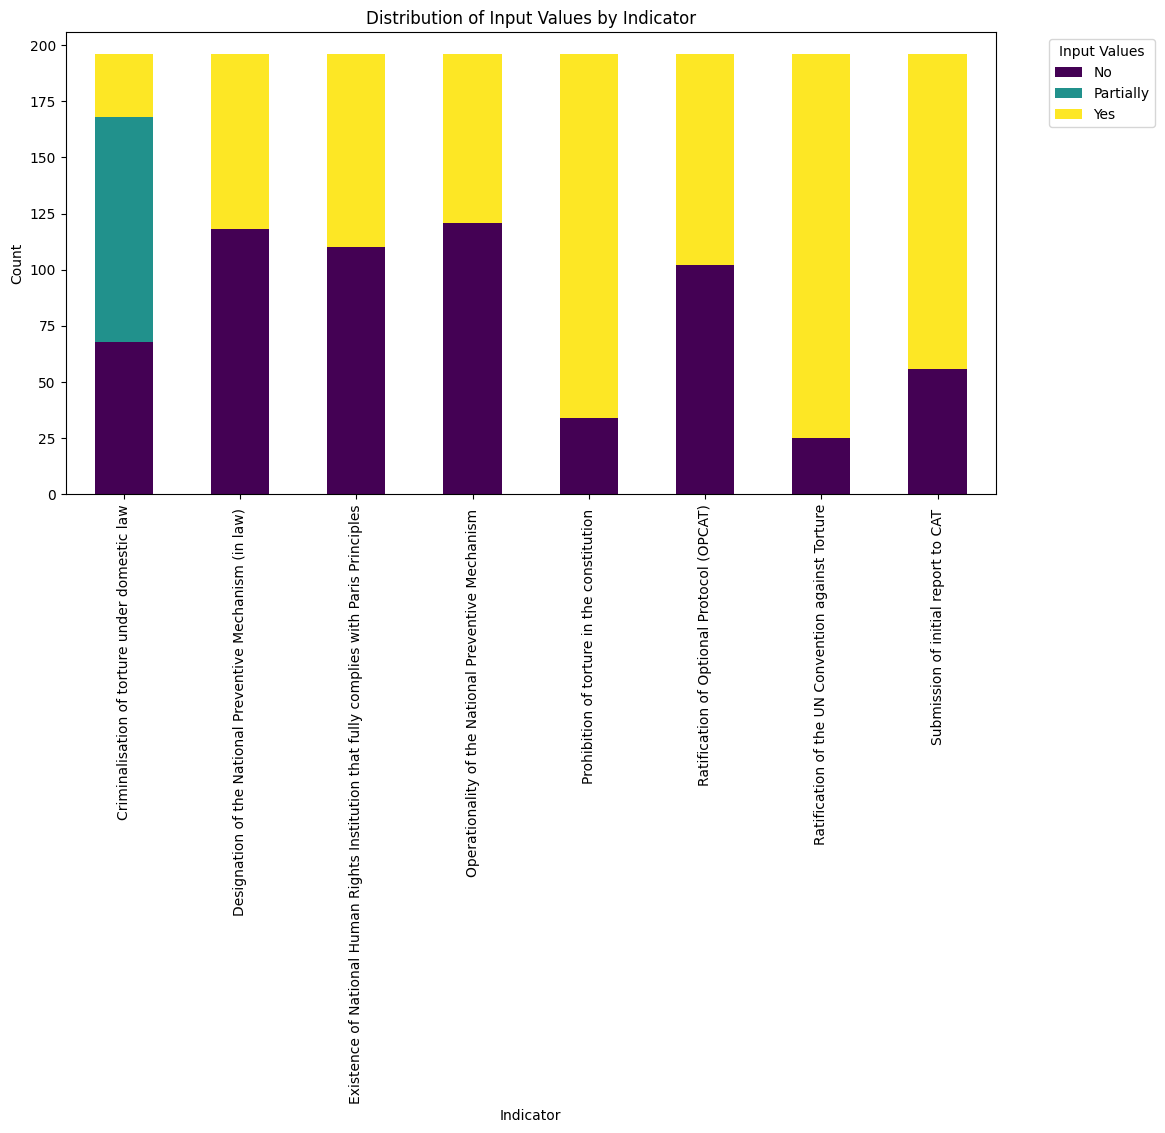

In [17]:
import matplotlib.pyplot as plt

input_distribution.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("Distribution of Input Values by Indicator")
plt.ylabel("Count")
plt.xlabel("Indicator")
plt.legend(title="Input Values", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

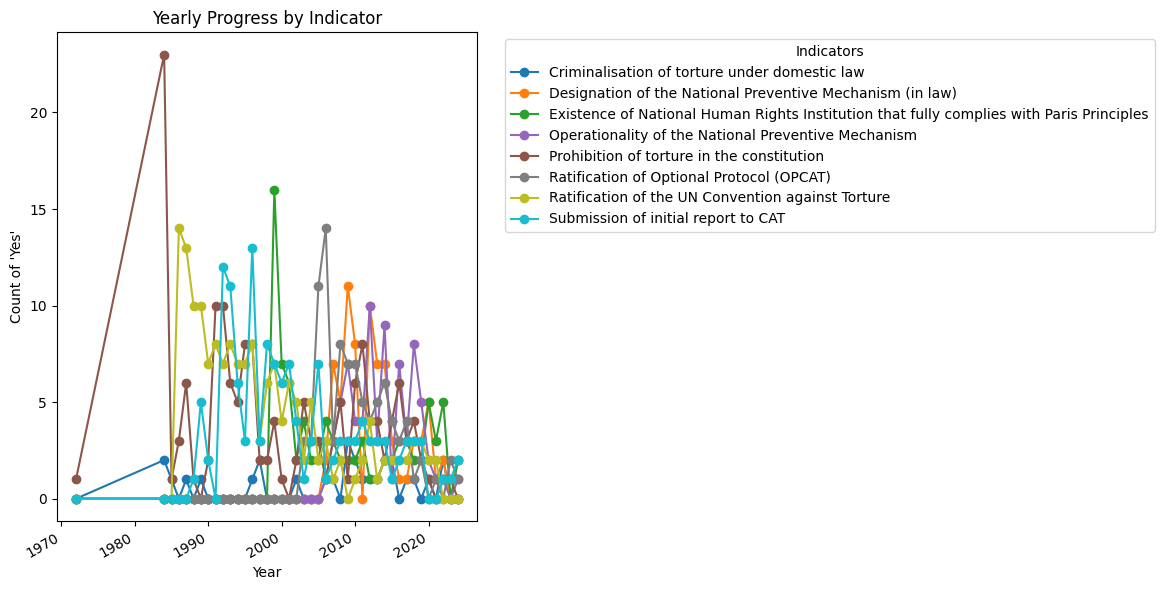

In [18]:
indicator_trends = df[df['Input'] == 'Yes'].groupby(['Date', 'Indicator']).size().unstack(fill_value=0)
indicator_trends.plot(figsize=(12, 6), colormap='tab10', marker='o')

plt.title("Yearly Progress by Indicator")
plt.ylabel("Count of 'Yes'")
plt.xlabel("Year")
plt.legend(title="Indicators", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


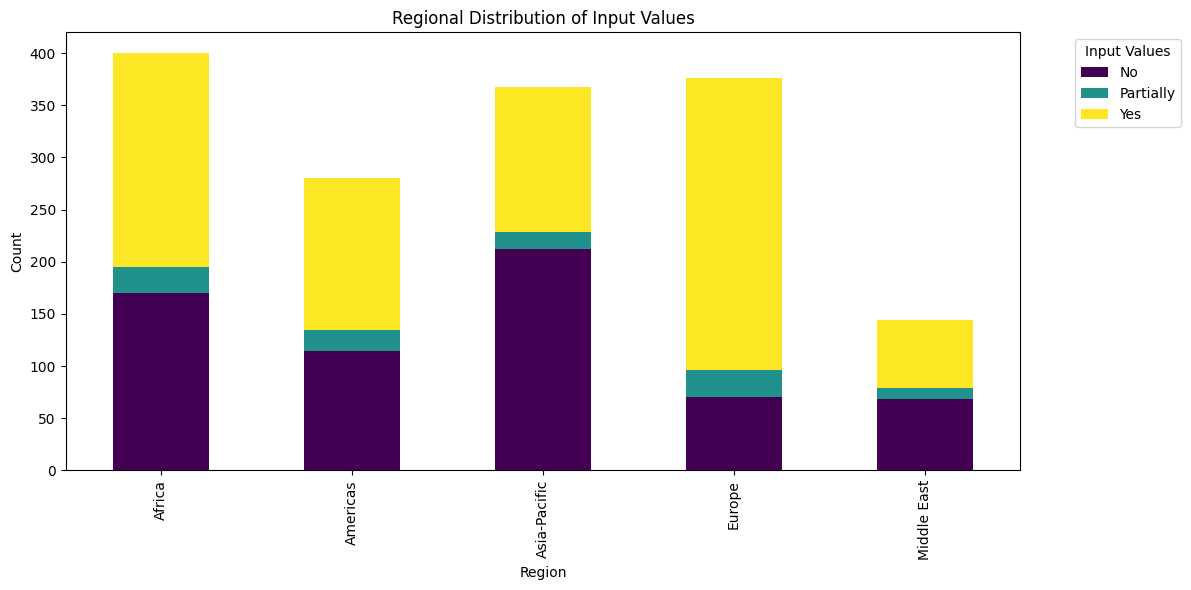

In [19]:
regional_progress = df.groupby(['Region', 'Input']).size().unstack(fill_value=0)
regional_progress.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

plt.title("Regional Distribution of Input Values")
plt.ylabel("Count")
plt.xlabel("Region")
plt.legend(title="Input Values", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


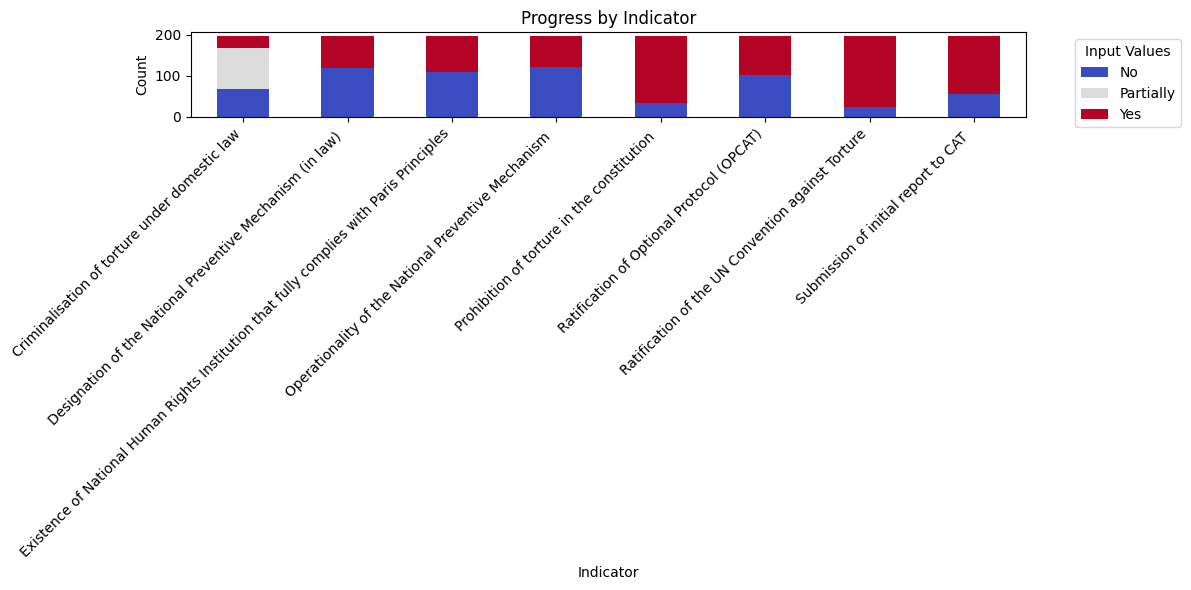

In [20]:
indicator_summary = df.groupby(['Indicator', 'Input']).size().unstack(fill_value=0)
indicator_summary.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')

plt.title("Progress by Indicator")
plt.ylabel("Count")
plt.xlabel("Indicator")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Input Values", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [21]:
gaps = df[df['Input'] == 'No'].groupby(['Country', 'Indicator']).size().unstack(fill_value=0)
print(gaps)


Indicator            Criminalisation of torture under domestic law  \
Country                                                              
Afghanistan                                                      0   
Algeria                                                          0   
Andorra                                                          0   
Angola                                                           0   
Antigua and Barbuda                                              0   
...                                                            ...   
Venezuela                                                        0   
Viet Nam                                                         1   
Yemen                                                            1   
Zambia                                                           1   
Zimbabwe                                                         1   

Indicator            Designation of the National Preventive Mechanism (in law)   \
Countr

## Visualizations

In [22]:
# KPI 1: Total Ratifications
total_ratifications = df[(df['Indicator'] == 'Ratification of the UN Convention against Torture') & (df['Input'] == 'Yes')].shape[0]

# KPI 2: Total Operational Mechanisms
total_operational = df[(df['Indicator'] == 'Operationality of the National Preventive Mechanism') & (df['Input'] == 'Yes')].shape[0]

# Print KPIs
print(f"Total Ratifications: {total_ratifications}")
print(f"Total Operational Mechanisms: {total_operational}")


Total Ratifications: 171
Total Operational Mechanisms: 0


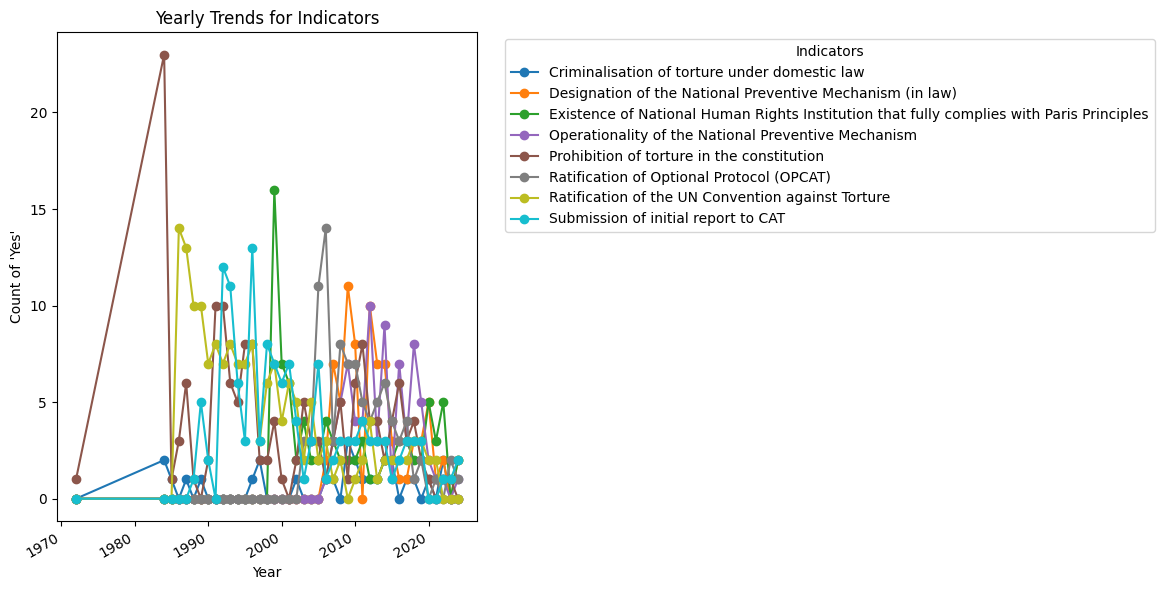

In [23]:
# Group data by year and indicator
yearly_trends = df[df['Input'] == 'Yes'].groupby(['Date', 'Indicator']).size().unstack(fill_value=0)

# Plot trends
yearly_trends.plot(figsize=(12, 6), marker='o', colormap='tab10')
plt.title("Yearly Trends for Indicators")
plt.ylabel("Count of 'Yes'")
plt.xlabel("Year")
plt.legend(title="Indicators", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [24]:
df_yes = df[df['Input'] == 'Yes']

# Step 2: Group by Country and count how many unique treaties (Indicators) each country has ratified
country_treaty_count = df_yes.groupby('Country')['Indicator'].nunique()

# Step 3: Identify countries that have ratified all 8 treaties (or a specific number, in this case 8)
countries_with_all_treaties = country_treaty_count[country_treaty_count == 8].index.tolist()

# Display the result
print("Countries with all 8 treaties ratified:")
print(countries_with_all_treaties)

Countries with all 8 treaties ratified:
['Albania', 'Argentina', 'Croatia', 'Cyprus', 'Lithuania', 'Mauritania', 'New Zealand', 'Republic of Moldova']


In [25]:

# Filter only rows where the treaty is ratified (Input = 'Yes')
ratified_treaties = df[df['Input'] == 'Yes']

# Step 1: Find unique countries with at least one treaty per region
countries_with_treaty = ratified_treaties.groupby('Region')['Country'].nunique()

# Step 2: Find total unique countries in each region
total_countries_per_region = df.groupby('Region')['Country'].nunique()

# Step 3: Calculate percentage of countries with at least one treaty per region
percentage_countries_with_treaty = (countries_with_treaty / total_countries_per_region) * 100

# Display results
result = pd.DataFrame({
    'Countries with at least one treaty': countries_with_treaty,
    'Total countries': total_countries_per_region,
    'Percentage (%)': percentage_countries_with_treaty
})

print(result)


              Countries with at least one treaty  Total countries  \
Region                                                              
Africa                                        50               50   
Americas                                      34               35   
Asia-Pacific                                  39               46   
Europe                                        47               47   
Middle East                                   18               18   

              Percentage (%)  
Region                        
Africa            100.000000  
Americas           97.142857  
Asia-Pacific       84.782609  
Europe            100.000000  
Middle East       100.000000  
